## Imports


## The problem is We are going to train and predict model using Keras and Tensorflow

In [118]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

Import all the dependency before starting the project


In [119]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime


from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt



%matplotlib inline

## Constants

In [120]:
LOG_DIR= 'tensorboard_cifar_logs/'

Label_names=['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
Image_width = 32
Image_height = 32
Image_pixels = Image_width * Image_height
Color_changes = 3
Total_inputs = Image_pixels * Color_changes
NR_CLASSES = 10



Validation_size = 10000
Small_train_size = 1000

## Get the data

We are loading the data from Cifar10 which also available in the following website: https://www.cs.toronto.edu/~kriz/cifar.html

There ar total 60,000 Images, 50,000 is for Training and 10,000 is for testing

In [122]:
(x_train_all, y_train_all),(x_test, y_test) = cifar10.load_data()

In [123]:
type(cifar10)
type(x_train_all)

numpy.ndarray

## Explore the data

Here we are just looking at the data and playing with it :)

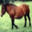

In [124]:
pic = array_to_img(x_train_all[7])
display(pic)

In [125]:
y_train_all.shape

(50000, 1)

In [126]:
Label_names[y_train_all[7][0]]

'Horse'

<function matplotlib.pyplot.show(close=None, block=None)>

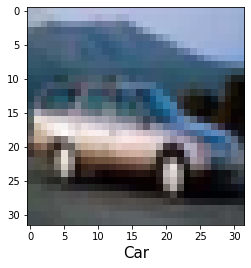

In [127]:
plt.imshow(x_train_all[4])
plt.xlabel(Label_names[y_train_all[4][0]], fontsize=15)
plt.show

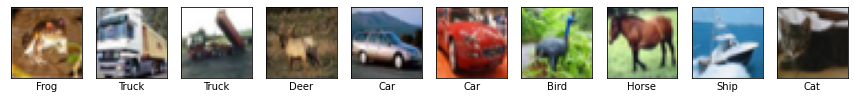

In [128]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([]) #used to remove the side markings in the plots
    plt.yticks([])
    plt.xlabel(Label_names[y_train_all[i][0]],) #loading the labels from y
    plt.imshow(x_train_all[i])

In [129]:
x_train_all[0].shape

(32, 32, 3)

In [130]:
x_train_all.shape

(50000, 32, 32, 3)

## Preprocess the data

In [16]:
x_train_all[0][0][0] #unit is unsigned number

array([59, 62, 63], dtype=uint8)

In [17]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0 

In [18]:
x_train_all[0][0][0][0]

0.23137254901960785

In [19]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], Total_inputs)

In [20]:
x_train_all.shape

(50000, 3072)

In [21]:
x_test = x_test.reshape(len(x_test), Total_inputs)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


## Create Validation Set

In [22]:
x_val = x_train_all[:Validation_size]
y_val = y_train_all[:Validation_size]
x_val.shape

(10000, 3072)

In [23]:
x_train = x_train_all[Validation_size:]
y_train = y_train_all[Validation_size:]
x_train.shape

(40000, 3072)

## Create a small dataset (For illustration)

In [24]:
#here we are using small data to just train our model

x_train_xs = x_train[:Small_train_size]
y_train_xs = y_train[:Small_train_size]

## Define the neural network using keras


In [52]:
#rectified linear unit (relu)
model_1 = Sequential([
    Dense(units=128, input_dim=Total_inputs, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [53]:
model_2=Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(Total_inputs,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [54]:
model_3=Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(Total_inputs,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [45]:
type(model_2)

tensorflow.python.keras.engine.sequential.Sequential

In [26]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [27]:
 model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


## Tensorboard (visualising learning)

In [40]:
#tensorboard --logdir=(paste the folder location)
def get_tensorboard(model_name):

    folder_name= f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

## Fit the model

In [41]:
samples_per_batch = 1000

In [42]:
# %%time
# nr_epochs = 150
# model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 1')], verbose=0)

Successfully created directory
Wall time: 3.88 s


In [50]:
# %%time
# nr_epochs = 150
# model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 2')], verbose=0)

Successfully created directory
Wall time: 6.25 s


In [55]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0)

Successfully created directory
Wall time: 1min 1s


In [56]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0)

Successfully created directory
Wall time: 2min 13s


In [57]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 3 XL')], verbose=0)

Successfully created directory
Wall time: 2min 19s


## Prediction on individual Images

In [58]:
 x_val[0].shape

(3072,)

In [61]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [63]:
np.set_printoptions(precision=3)

In [64]:
model_2.predict(test)

array([[0.064, 0.023, 0.079, 0.131, 0.413, 0.073, 0.086, 0.13 , 0.   ,
        0.001]], dtype=float32)

In [66]:
model_2.predict(x_val).shape

(10000, 10)

In [69]:
model_2.predict_classes(test)

array([4], dtype=int64)

In [70]:
y_val[0]

array([6], dtype=uint8)

Loop where you print out the actual value and the predicted value for the first 10 images in the valuation dataset

In [71]:
 for number in range(10):
        test_img = np.expand_dims(x_val[number], axis=0)
        predicted_val = model_2.predict_classes(test_img)[0]
        print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

Actual value: 6 vs. predicted: 4
Actual value: 9 vs. predicted: 1
Actual value: 9 vs. predicted: 9
Actual value: 4 vs. predicted: 4
Actual value: 1 vs. predicted: 8
Actual value: 1 vs. predicted: 9
Actual value: 2 vs. predicted: 2
Actual value: 7 vs. predicted: 7
Actual value: 8 vs. predicted: 8
Actual value: 3 vs. predicted: 9


# Evaluation

In [72]:
model_2.metrics_names

['loss', 'accuracy']

In [79]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy: 0.1%}')

313/313 [==============================] - 0s 783us/step - loss: 1.4054 - accuracy: 0.4934
Test loss is 1.41 and test accuracy is  49.3%


## Confusion matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

In [81]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [82]:
conf_matrix.shape

(10, 10)

In [83]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [84]:
conf_matrix.max()

723

In [86]:
conf_matrix.min()

4

In [97]:
conf_matrix[0]

array([504,  27,  65,  25,  35,  20,  22,  27, 218,  57], dtype=int64)

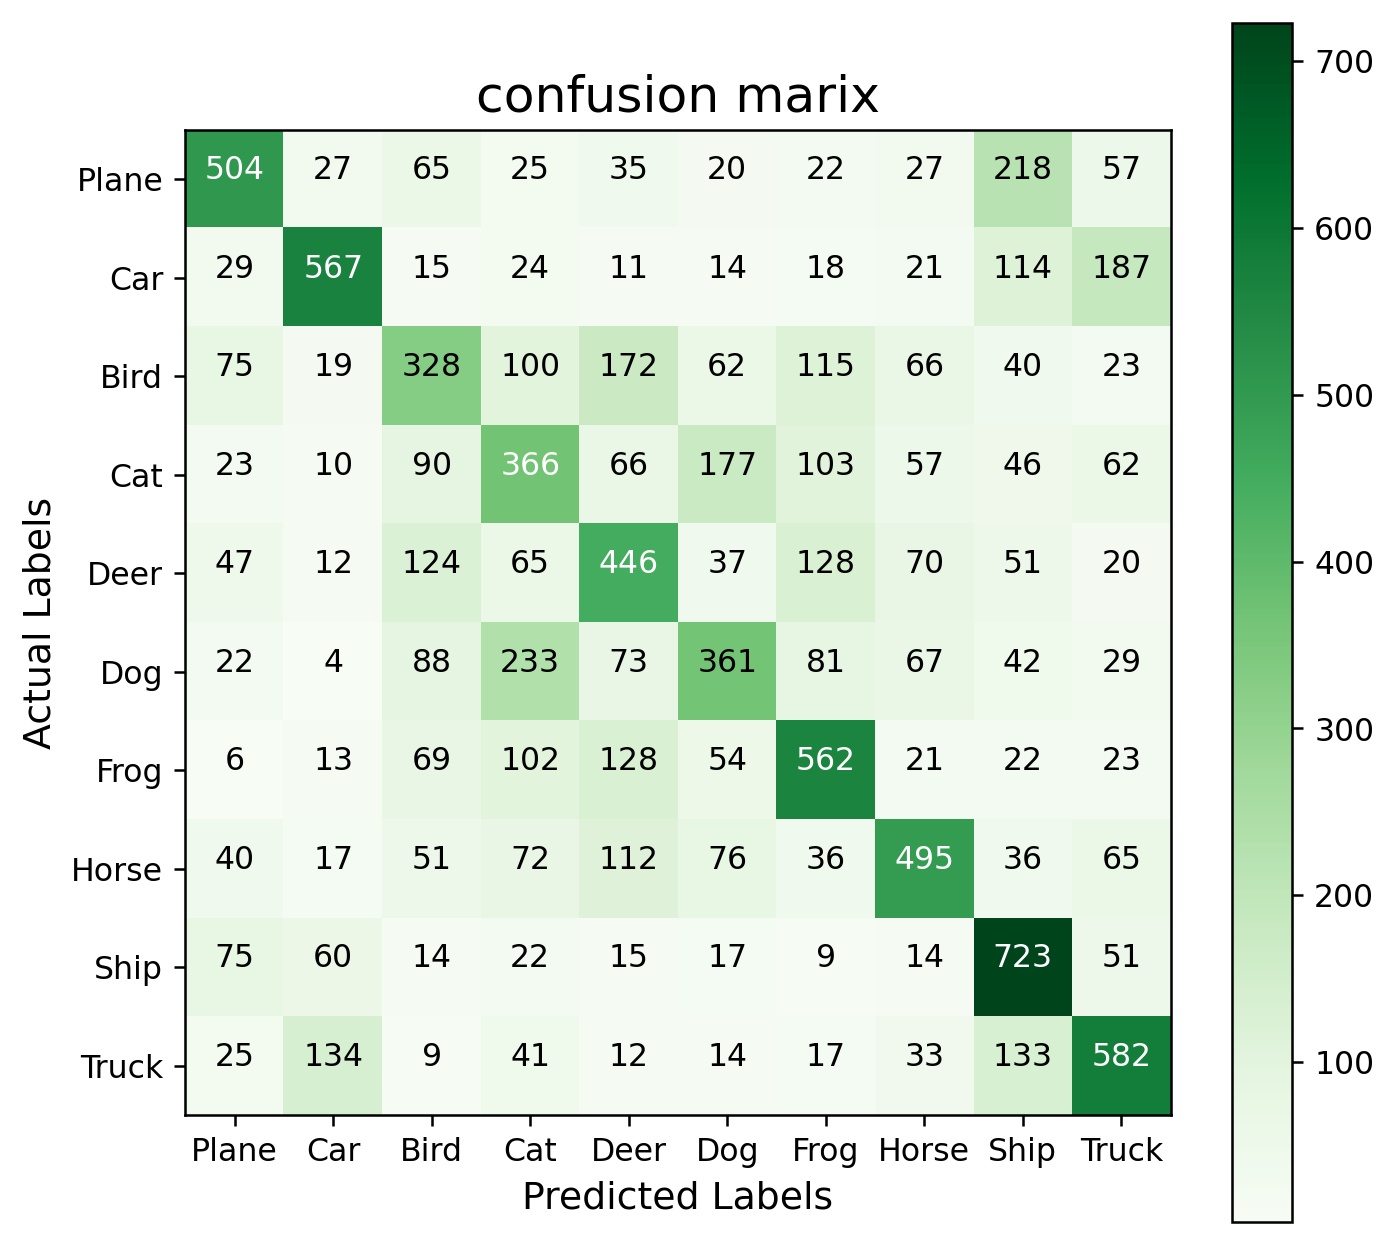

In [107]:
import itertools

plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)


plt.title('confusion marix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks= np.arange(NR_CLASSES)
plt.yticks(tick_marks, Label_names)
plt.xticks(tick_marks, Label_names)

plt.colorbar()

for i,j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i,j], horizontalalignment='center',
            color='white' if conf_matrix[i,j]>conf_matrix.max()/2 else 'black')

plt.show()

What do the numbers down the diagonal represent? What do the other numbers(excluding the number in the diagonal) in a single row represent? Try to identify the false positives, false negatives, and the true positives in the confusion matrix.

In [108]:
#true positive
np.diag(conf_matrix)

array([504, 567, 328, 366, 446, 361, 562, 495, 723, 582], dtype=int64)

In [109]:
recall = np.diag(conf_matrix)/ np.sum(conf_matrix, axis=1)
recall

array([0.504, 0.567, 0.328, 0.366, 0.446, 0.361, 0.562, 0.495, 0.723,
       0.582])

In [112]:
precision= np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.596, 0.657, 0.385, 0.349, 0.417, 0.434, 0.515, 0.568, 0.507,
       0.53 ])

In [113]:
avg_recall = np.mean(recall)
print(f'Model 2 score is {avg_recall:.2%}')

Model 2 score is 49.34%


In [115]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')


f1_score = 2*(avg_precision * avg_recall) /(avg_precision + avg_recall)
print(f'Model 2f score is {f1_score:.2%}')

Model 2 precision score is 49.57%
Model 2f score is 49.45%
